<a href="https://colab.research.google.com/github/jmorenosa/SolvingTheRubiksCubeWithGAP/blob/main/Proyecto_Entrega2_MorenoS%C3%A1nchezJuanAndr%C3%A9s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resolviendo el cubo de Rubik con GAP 


##Introducción

El cubo de Rubik es un famoso rompecabezas, donde nuestro objetivo es ordenar las piezas del cubo de tal manera que las seis caras tengan fichas de un mismo color. Este puzzle se ha hecho muy famoso, actualmente existen diferentes métodos para resolverlo, unos más eficientes que otros, existen también algoritmos computacionales para su óptima solución. Sin embargo, el objetivo en esta ocasión, es explicar desde una perspectiva matemática los conceptos detrás del puzzle y lograr modelarlo para finalmente resolverlo con ayuda del software GAP, que está enfocado precisamente en estructuras algebraicas como lo son los grupos. 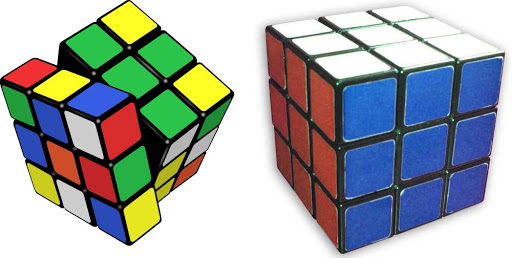

Como se mencionó anteriormente, existe muchísima información acerca de cómo resolver el cubo, también hay bastantes escritos o papers que describen a la perfección la teoría de grupos detrás del puzzle, como las [notas de clase](http://people.math.harvard.edu/~jjchen/docs/Group%20Theory%20and%20the%20Rubik's%20Cube.pdf) escritas por la profesora Janet Chen del departamento de matemáticas de la Universidad de Harvard. No obstante, no existe mucha información respecto a cómo resolverlo con GAP. 
En la página oficial de GAP existen ejemplos para estudiar las permutaciones y algunos movimientos del cubo pero no tiene un enfoque en cómo resolver alguna combinación en particular. Finalmente, cabe mencionar que existe una [tesis de licenciatura](http://www.algebra.uni-linz.ac.at/Projects/FurtherProjects/Kainberger/) de la autoría de Paul Kainberger (egresado de la Universidad Johannes Kepler en Austria) que aborda la teoría de grupos con el cubo de Rubik y propone un algoritmo para resolverlo en GAP, y aunque el enfoque del trabajo de tesis es hacer un guía paso a paso para resolver el cubo y el problema se aborda de manera distinta, parte de lo explicado aquí se basa en ese trabajo. 


##Materiales y métodos


Como primera medida para darle al cubo un tratamiendo matemático, se define para cada una de las piezas un número, como se ve a continuación (es necesario también definir la orientación del cubo, pues de lo contrario nunca sabríamos cómo realizar los movimiento, en este caso se ha usado como cara frontal la rosada y como superior la amarilla y los movimientos se han declarado con la [notación Singmaster](https://es.wikibooks.org/wiki/Cubo_de_Rubik/Generalidades/Notaci%C3%B3n_Singmaster#:~:text=La%20%C2%ABNotaci%C3%B3n%20Singmaster%C2%BB%20es%20un,cubo%20de%20Rubik%20la%20usan.))

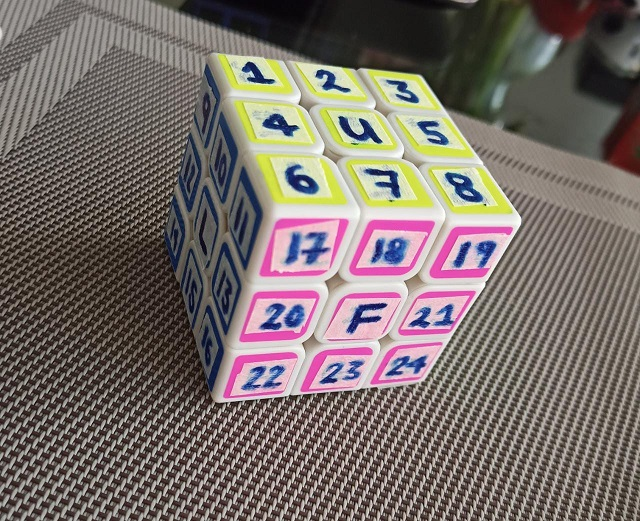

En cuanto a describir los movimientos, veamos un ejemplo, en la notación Singmaster la letra U de Up (Arriba) representa un movimiendo en sentido horario de la cara superior del cubo, entonces el número 1 pasa a la posición del 3, el 3 a la del 8, el 8 a la del 6 y el 6 a la del 1, lo que se puede representar con la notación cíclica como (1,3,8,6). Al realizar el mismo movimiento, el 2 también cambia de posición por la del 5, el 5 por la del 7 y así sucesivamente. De esta manera son descritas todas todas las permutaciones que pertenecen al movimiento. 

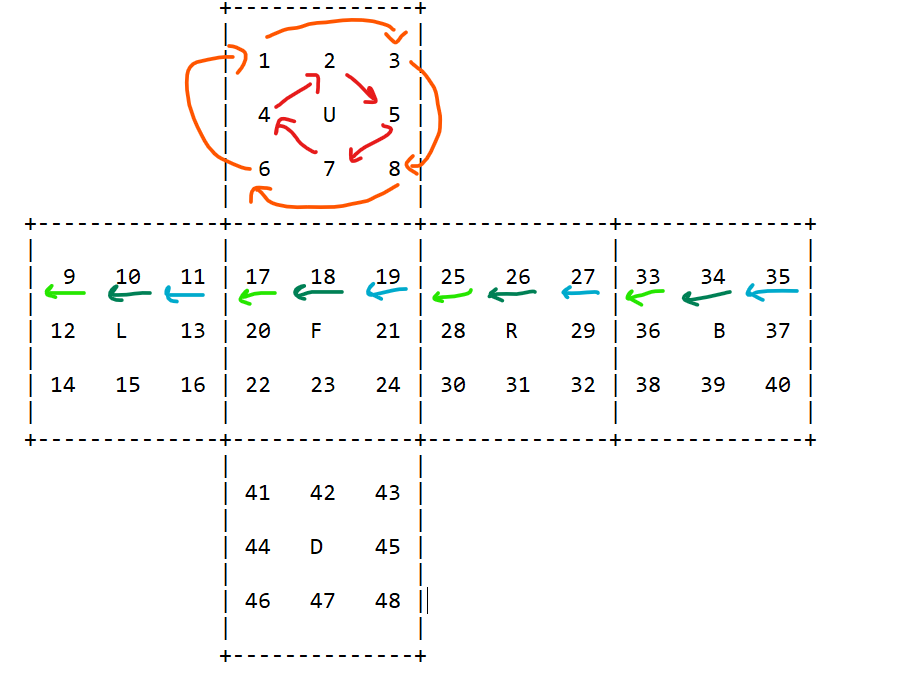

Los movimientos del cubo son entonces descritos como permutaciones de los números que aparecen en la imagen de arriba y se está utilizando notación cíclica para todos ellos: 

(Para declarar una variable en GAP se utiliza ":=" y las sentencias terminan con punto y coma (;) 

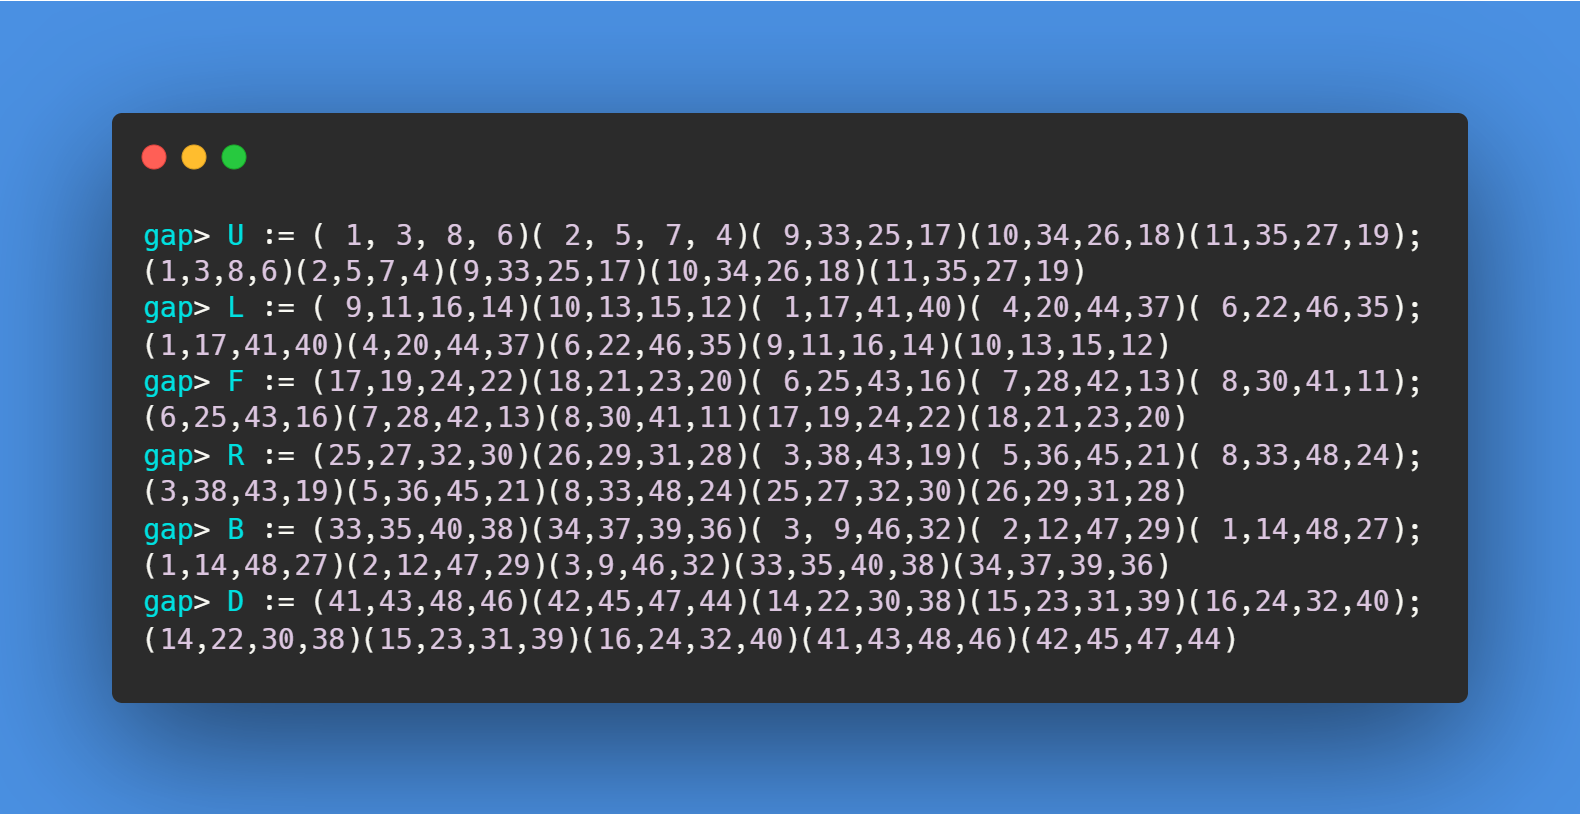

Un punto muy importante para resolver el problema es entender el cubo como UN GRUPO.

Entonces surge la pregunta ¿Es el cubo de Rubik un grupo? 

Se define G como el posible grupo, cuyos elementos son los movimientos (M) del cubo de Rubik, y como operación (×) el realizar un movimiento y luego otro, por ejemplo, la operación M1×M2 es hacer el movimiento M1 y luego el movimiento M2.

Entonces analicemos todas las condiciones que son necesarias para que sea considerado un grupo: 


*   G es claramente cerrado bajo ×, pues hacer un movimiento y luego otro, es otro movimiento (configuración del cubo). 
*   Si entendemos e como el movimiento vacío (es decir, un movimiento que NO cambia la configuración del cubo de Rubik en lo absoluto) se tiene que M x e = M. Entonces se tiene un elemento identidad bien definido.
*  Si M es un movimiento, nosotros podemos "retroceder" ese movimiento para obtener el movimiento M', en otras palabras "Hacemos el movimiento M y luego retrocedemos todos los pasos de M", esto es equivalente a no hacer nada, entonces M x M' = e, entonces M' es la inversa de M. Por lo tanto, todo elemento en G tiene definida su inversa. 
*  Por último se debe probar que x es una operación asociativa, es decir, tenemos que probar que M1 x (M2 x M3) = (M1 x M2) x M3

Es evidente que para cualesquiera tres movimientos del cubo se satisface esto, pues la operación x es solo hacer un movimiento trás de otro, es lo mismo, o equivalente hacer el movimiento M1 y luego M2 y M3, que hacer primero M1 Y M2 y luego M3. 

Si ponemos un ejemplo en notación Singmaster, es lo mismo (UxF)x R que Ux(FxR)











Otro concepto al que tenemos que acudir es al concepto de GENERADOR. 

Entonces, sea G un grupo y sea S un subconjunto de G, decimos que S genera a G o que S es un conjunto generador de G si todo elemento de G puede ser escrito como un producto finito (bajo la operación definida) de elementos de S y sus inversas.

Ejemplo: Todo entero puede ser escrito como la suma finita de 1 o de -1, entonces se dice que {1} es generador de los enteros.


Con esto tenemos que el cubo de Rubik sí es un grupo y basado en el concepto de generador, podemos afirmar que {U,D,L,R,F,B} son generadores, pues cualquier configuración del cubo puede ser obtenida como una secuencia (producto) de estos seis movimientos.

Con lo que llegamos a la siguiente instrucción en GAP, que es declarar el grupo del cubo de Rubik, donde pasamos como parámetro, los movimientos que definimos anteriormente. 

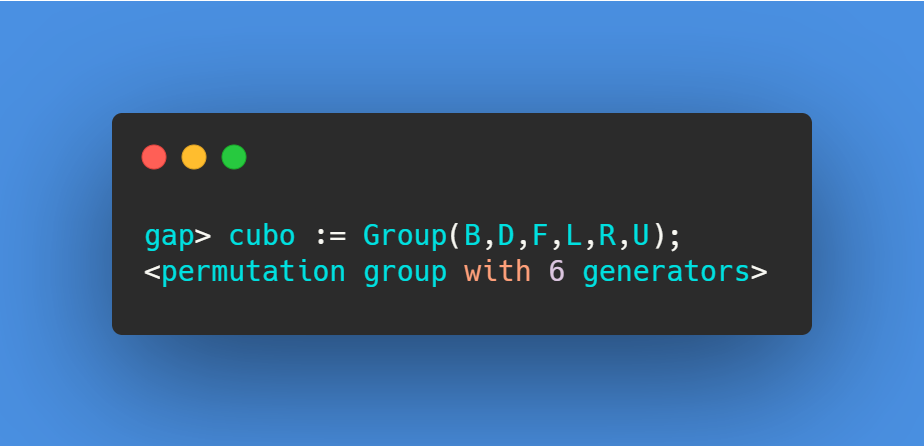

Como vemos GAP nos dice que hemos creado un grupo de permutaciones con 6 generadores. 

Una anotación interesante (que de hecho ya había sido abordada en clase) es conocer el número total de configuraciones posibles que tiene el cubo, para ello podemos usar la función Size() de GAP que nos retorna el tamaño del grupo: 

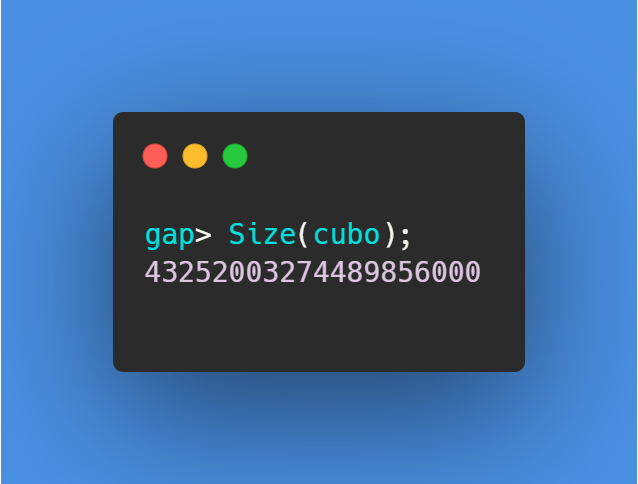

Retomando la idea de resolver el cubo, uno de los propósitos de enumarar los colores más allá del fin de describir los movimientos es describir la permutación asociada a cualquier configuración del cubo. 

Veamos a continuación la configuración del cubo desarmado: 

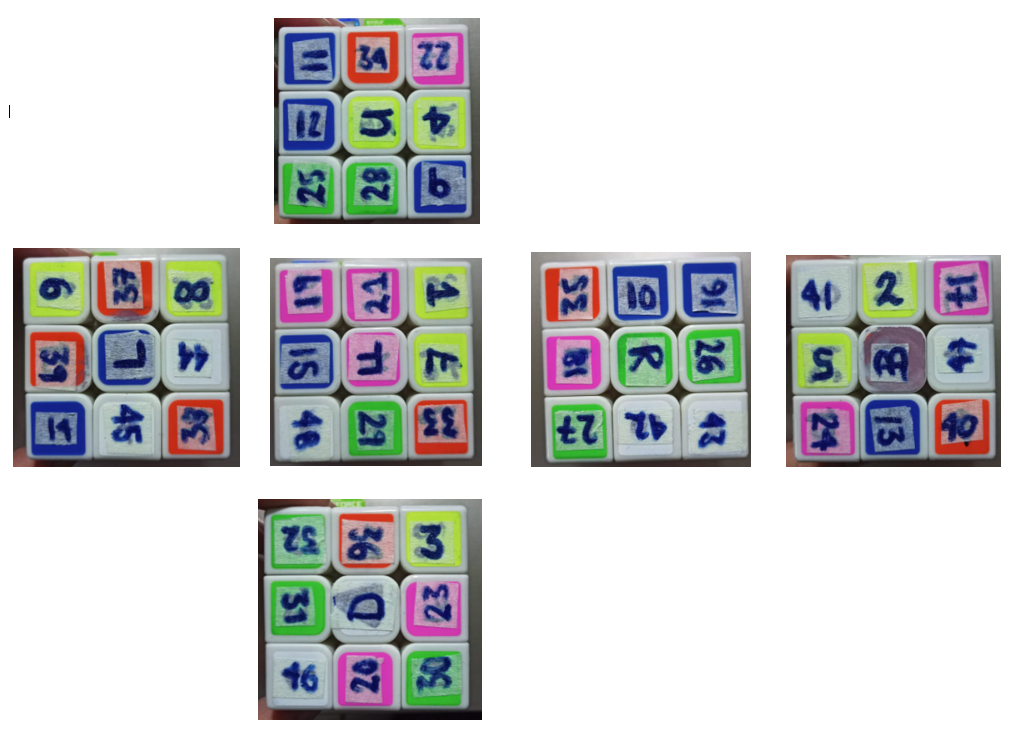

El hecho de que hayamos enumerado las piezas nos permite identificar cuál es la pieza que tenenemos en cada lugar, por ejemplo, el número 11 está donde debería ir la 1, la 34 donde debería ir la 2 y así con todas, veamos esta otra imagen para ilustrar mejor: 

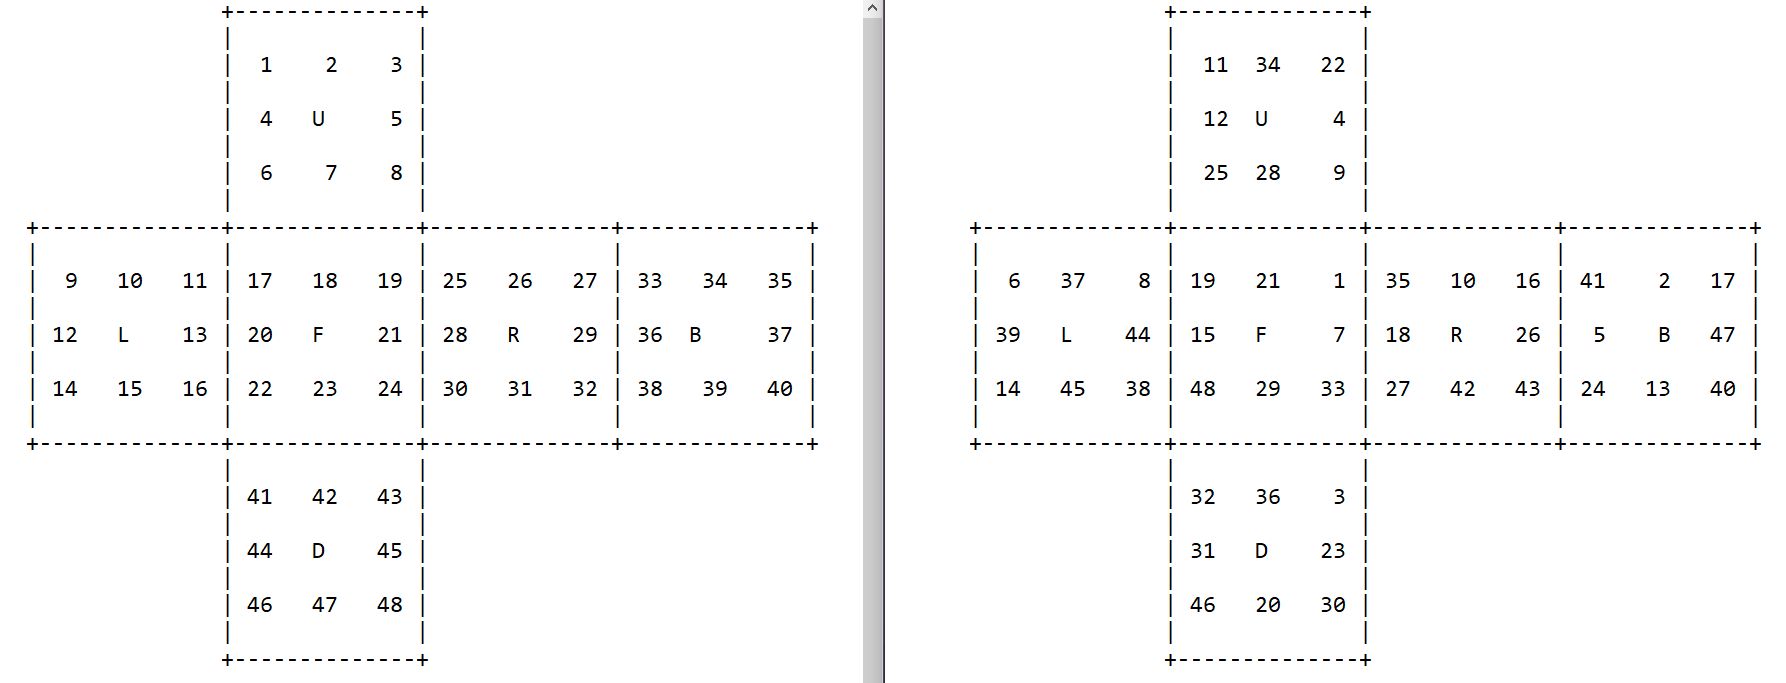

A la izquierda tenemos la configuración original del cubo (el cubo armado) y a la derecha tenemos el cubo desarmado, aquí es más fácil notar la permutación que se tiene.

Para describir esta permutación vamos a usar GAP y la función PermListList(), que recibe como parámetro dos listas, la permutación actual y la deseada y nos retorna la permutación en notación cíclica: 

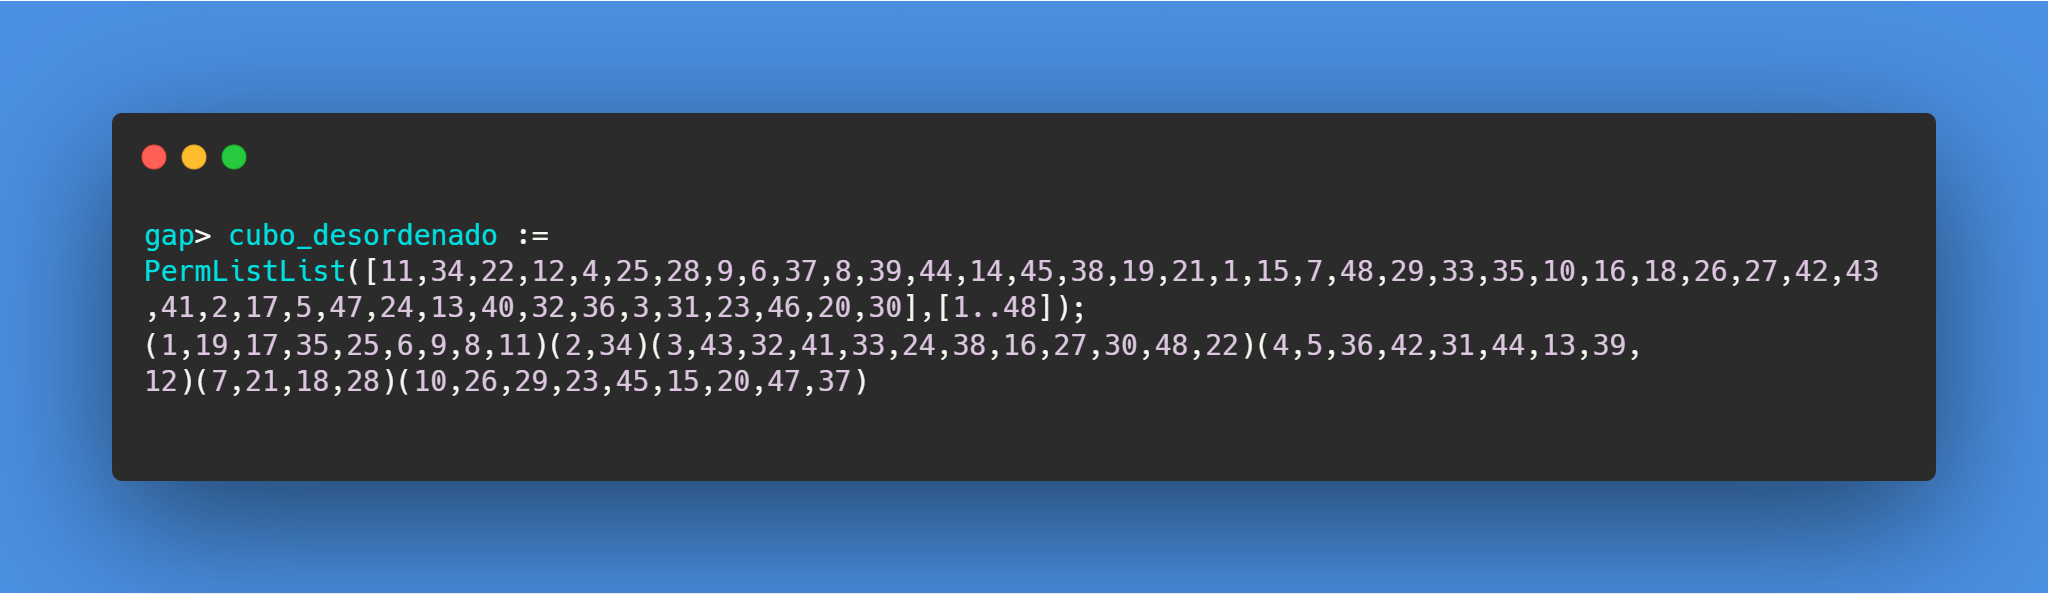

Cabe notar que en en GAP no tengo necesidad de escribir todos los números del 1 al 48, con escribir 1..48, el sistema entiende que son los números del 1 al 48.

Retomando la idea de resolver el cubo, debemos hacer uso de un concepto que no se abordó en clase y es GRUPO LIBRE, para explicar lo que es un grupo libre, es más sencillo tratarlo por partes: 

1. Definamos X como un conjunto de símbolos cualesquiera 
2. Definimos X^-1 como el conjunto que contiene todos los x^-1 para todos los x en el conjunto X, cabe notar que este grupo debe ser disyunto al anterior. 
3. Definimos T como la unión de X y X^-1



*   Un ejemplo sencillo es decir que X = {a,b,c} 
*   Entonces se tiene que X^-1 = {a^-1,b^-1,c^-1} 
*   y por último T sería = {a,b,c,a^-1,b^-1,c^-1}

Ahora definimos *palabra* sobre X como cualquier producto de elementos de T. Si en una palabra tenemos un elemento y está inmediatamente seguido por su inverso, entonces la palabra puede ser reducida omitiendo dicho par de elementos. 

Por ejemplo ab^3c^−1ca^−1c es una palabra sobre X que puede reducirse a ab^3a^-1c.

Entonces se define como grupo libre (Fx) todo el conjunto de palabras reducidas para un conjunto X cualquiera, cabe notar que este grupo tiene cardinalidad infinita, y se observa que es una contrucción general sin restricciones, es por eso que se llama grupo libre. 

Otro concepto que debemos abordar es el de homomorfismo, un homomorfismo es una función entre grupos (G,#) y (G',x)  f: G --> G' 
tal que para todo a,b en G se cumple que f(a#b) = f(a) x f(b) 

* Si f es inyectiva se dice monomorfismo 
* Si f es sobreyectiva se dice epimorfismo 
* y si f es biyectiva se dice isomorfismo (este fue el caso abordado en clase) 


Un hecho que será clave es que, dado un grupo G generado por un conjunto (finito) X, siempre podemos construir el grupo libre Fx sobre el conjunto X y un epimorfismo de Fx en G que envía cada generador de Fx al correspondiente generador de G.

Este último trozo puede ser un poco abstracto, pero ya se explicará mejor a continuación: 

#Resultados

Finalmente, pasamos a la idea original relacionada con el cubo, a encontrar una secuencia de pasos que transformarán el cubo de nuevo a su estado original. Esto equivale a una descomposición de un elemento del grupo del cubo en un producto de los generadores (U,D,L,R,F,B). Para ello introducimos un grupo libre y un homomorfismo del mismo en el grupo del cubo.

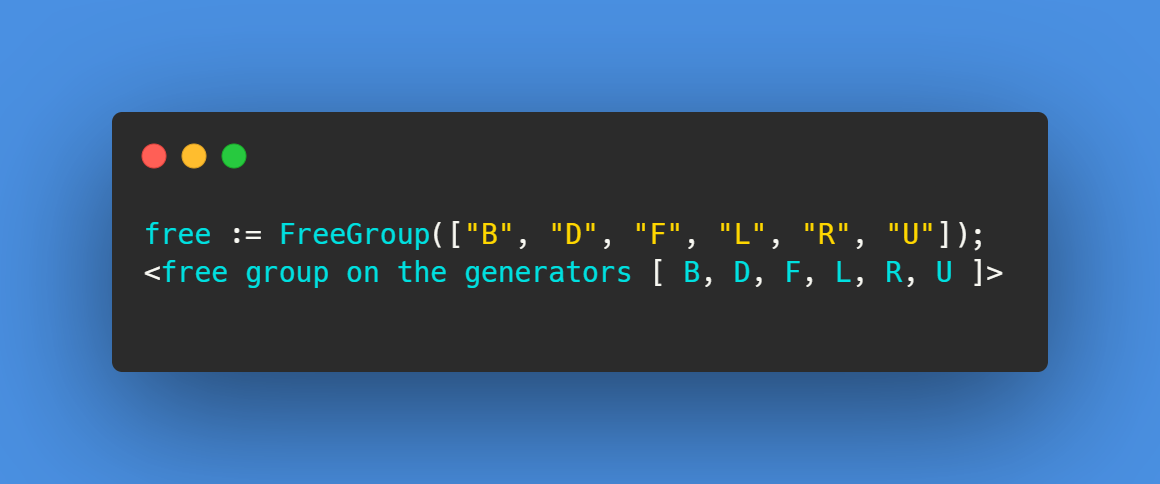

Hay que resaltar que estos generadores del grupo libre NO son los movimientos del cubo, las comillas nos permiten inferir que son simplemente strings y no las variables que hemos declarado previamente.

Ahora hacemos un homomorfismo desde el grupo libre al grupo del cubo, aquí sí se van a relacionar con los movimientos. La función GroupHomomorphismByImages(), recibe como primer parámetro el grupo de partida, luego el de llegada y los generadores de cada uno respectivamente.

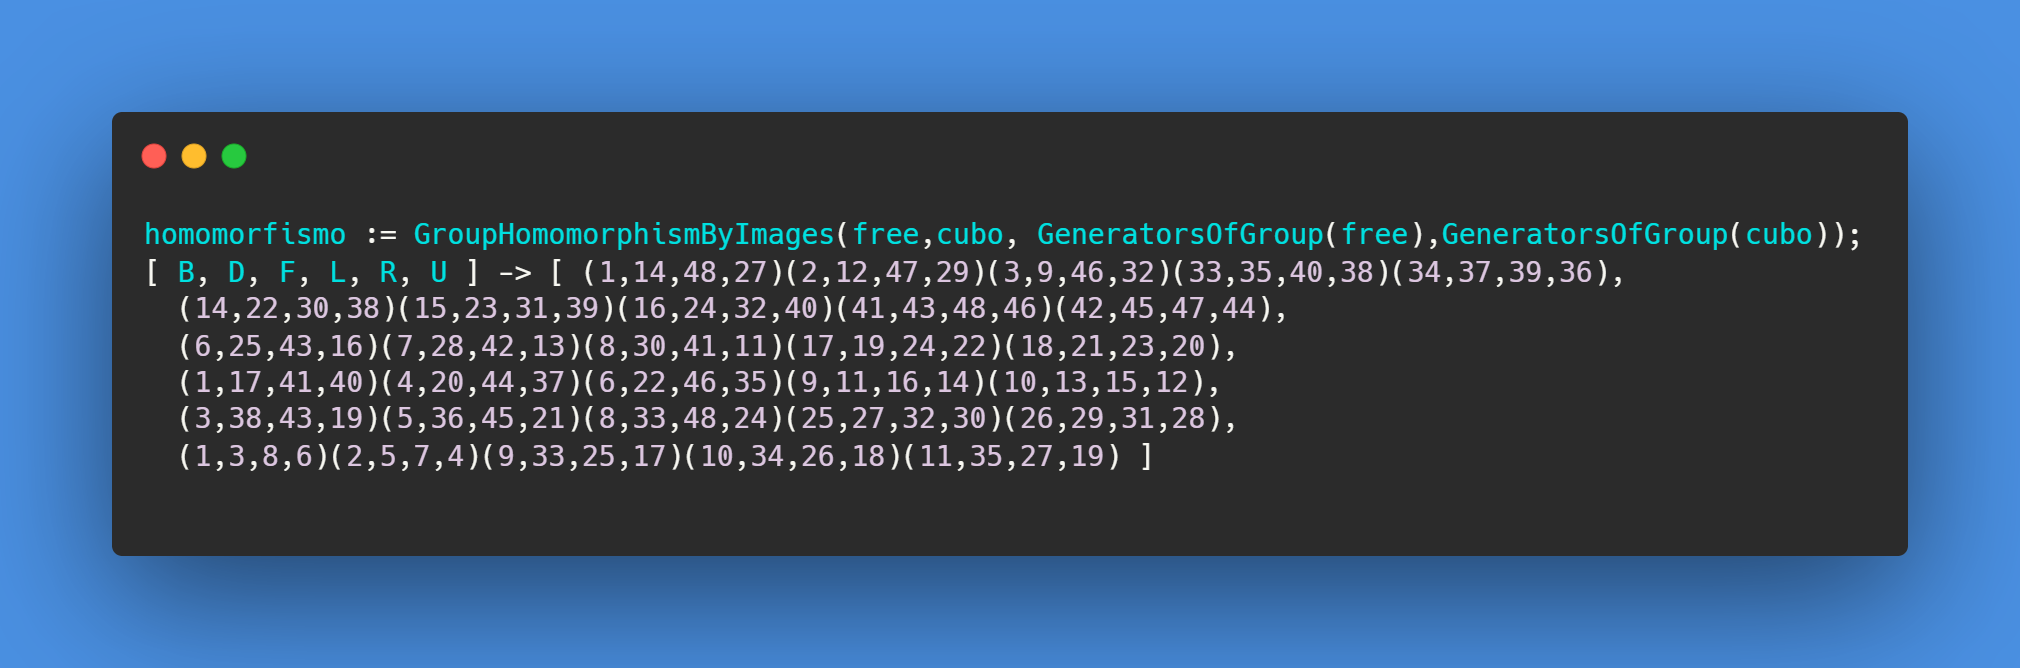

Queremos recuperar una combinación de movimientos que nos ha dado lugar a esta situación. Se trata de hallar una preimagen del homomorfismo del cubo desordenado. 

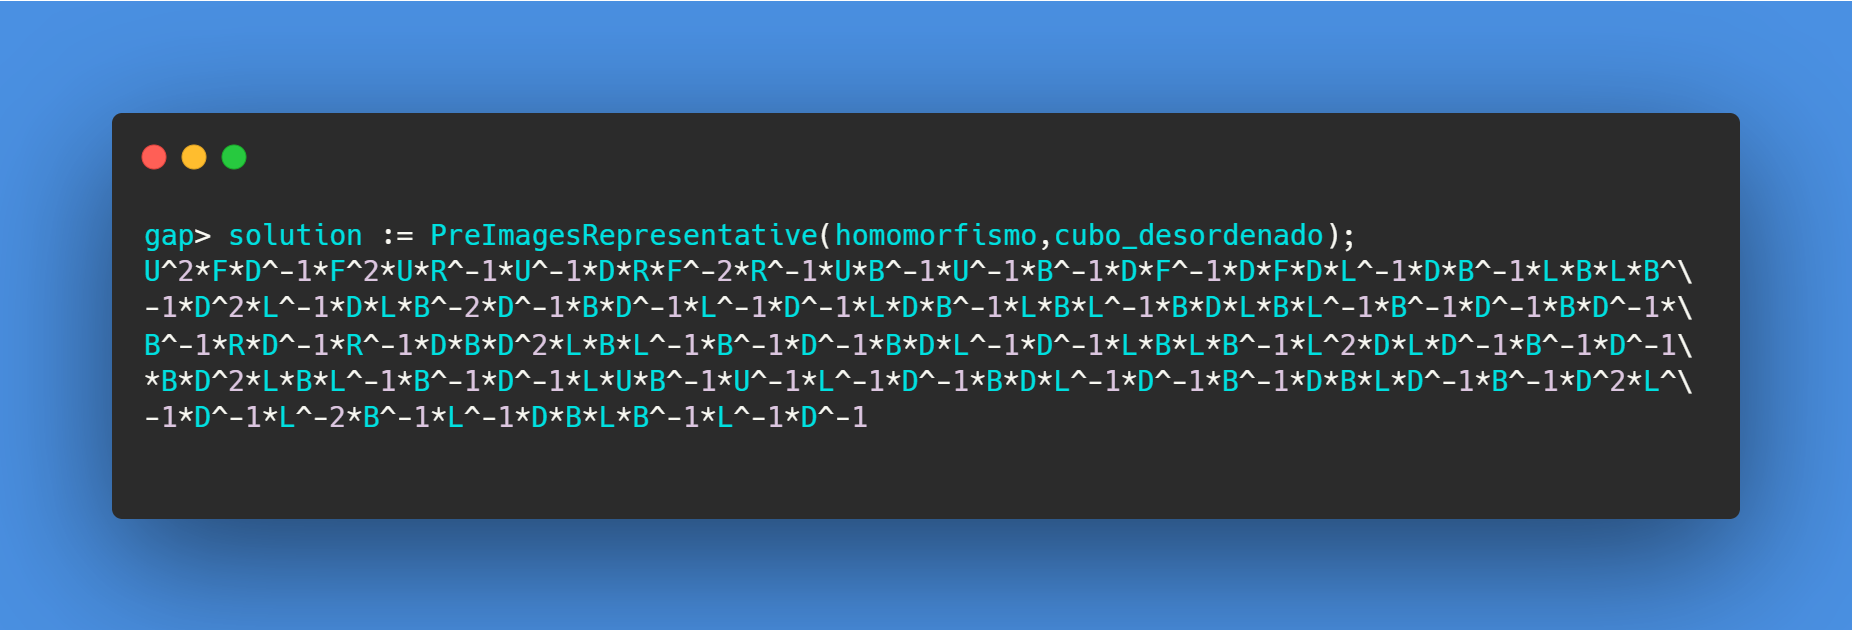

La respuesta de GAP es el conjunto de pasos que nos conducen de la posición original (bien armado) a la actual del cubo (desarmado), para comprobar esto, he creado un script corto que toma la respuesta de GAP y la pasa a la notación Singmaster: 

In [ ]:
solution = "U^2*F*D^-1*F^2*U*R^-1*U^-1*D*R*F^-2*R^-1*U*B^-1*U^-1*B^-1*D*F^-1*D*F*D*L^-1*D*B^-1*L*B*L*B^-1*D^2*L^-1*D*L*B^-2*D^-1*B*D^-1*L^-1*D^-1*L*D*B^-1*L*B*L^-1*B*D*L*B*L^-1*B^-1*D^-1*B*D^-1*B^-1*R*D^-1*R^-1*D*B*D^2*L*B*L^-1*B^-1*D^-1*B*D*L^-1*D^-1*L*B*L*B^-1*L^2*D*L*D^-1*B^-1*D^-1*B*D^2*L*B*L^-1*B^-1*D^-1*L*U*B^-1*U^-1*L^-1*D^-1*B*D*L^-1*D^-1*B^-1*D*B*L*D^-1*B^-1*D^2*L^-1*D^-1*L^-2*B^-1*L^-1*D*B*L*B^-1*L^-1*D^-1"

solution = solution.split("*") 

ans = ""

for element in solution: 
    if "^-1" in element: 
        ans += element[0]+"' " 
    elif "^2" in element or "^-2" in element: 
        ans += element[0]+"2 "
    else: 
        ans += element + " "
        
print(ans)

U2 F D' F2 U R' U' D R F2 R' U B' U' B' D F' D F D L' D B' L B L B' D2 L' D L B2 D' B D' L' D' L D B' L B L' B D L B L' B' D' B D' B' R D' R' D B D2 L B L' B' D' B D L' D' L B L B' L2 D L D' B' D' B D2 L B L' B' D' L U B' U' L' D' B D L' D' B' D B L D' B' D2 L' D' L2 B' L' D B L B' L' D' 


Ahora ingreso el algoritmo descrito en un [simulador](https://ruwix.com/widget/3d/?label=Cubo&alg=U2%20F%20D%27%20F2%20U%20R%27%20U%27%20D%20R%20F2%20R%27%20U%20B%27%20U%27%20B%27%20D%20F%27%20D%20F%20D%20L%27%20D%20B%27%20L%20B%20L%20B%27%20D2%20L%27%20D%20L%20B2%20D%27%20B%20D%27%20L%27%20D%27%20L%20D%20B%27%20L%20B%20L%27%20B%20D%20L%20B%20L%27%20B%27%20D%27%20B%20D%27%20B%27%20R%20D%27%20R%27%20D%20B%20D2%20L%20B%20L%27%20B%27%20D%27%20B%20D%20L%27%20D%27%20L%20B%20L%20B%27%20L2%20D%20L%20D%27%20B%27%20D%27%20B%20D2%20L%20B%20L%27%20B%27%20D%27%20L%20U%20B%27%20U%27%20L%27%20D%27%20B%20D%20L%27%20D%27%20B%27%20D%20B%20L%20D%27%20B%27%20D2%20L%27%20D%27%20L2%20B%27%20L%27%20D%20B%20L%20B%27%20L%27%20D%27&setupmoves=U2%20F%20D%27%20F2%20U%20R%27%20U%27%20D%20R%20F2%20R%27%20U%20B%27%20U%27%20B%27%20D%20F%27%20D%20F%20D%20L%27%20D%20B%27%20L%20B%20L%20B%27%20D2%20L%27%20D%20L%20B2%20D%27%20B%20D%27%20L%27%20D%27%20L%20D%20B%27%20L%20B%20L%27%20B%20D%20L%20B%20L%27%20B%27%20D%27%20B%20D%27%20B%27%20R%20D%27%20R%27%20D%20B%20D2%20L%20B%20L%27%20B%27%20D%27%20B%20D%20L%27%20D%27%20L%20B%20L%20B%27%20L2%20D%20L%20D%27%20B%27%20D%27%20B%20D2%20L%20B%20L%27%20B%27%20D%27%20L%20U%20B%27%20U%27%20L%27%20D%27%20B%20D%20L%27%20D%27%20B%27%20D%20B%20L%20D%27%20B%27%20D2%20L%27%20D%27%20L2%20B%27%20L%27%20D%20B%20L%20B%27%20L%27%20D%27&speed=100&flags=showalg) que encontré en internet 

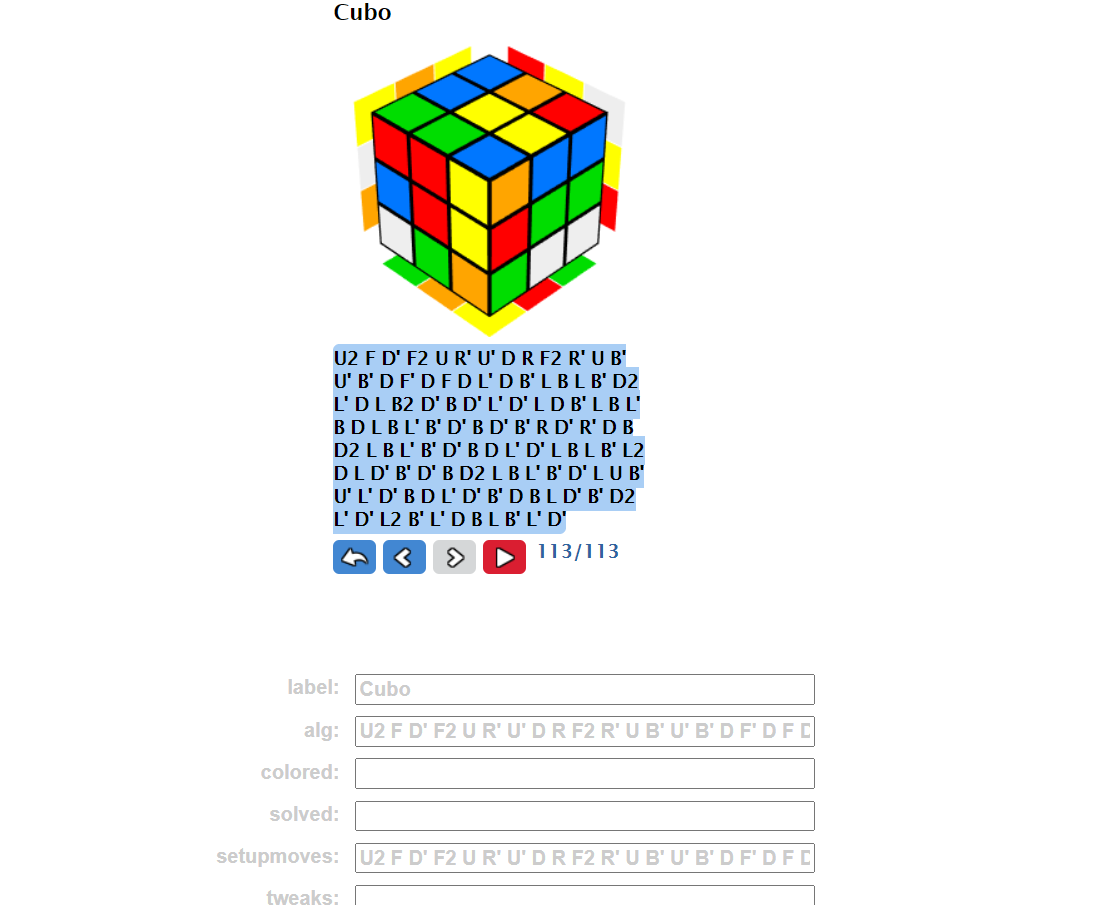

Cabe notar que EFECTIVAMENTE siguiendo el algoritmo SÍ se obtiene la configuración adecuada del cubo (también en las fotos de la parte de arriba se puede comprobar la configuración) 

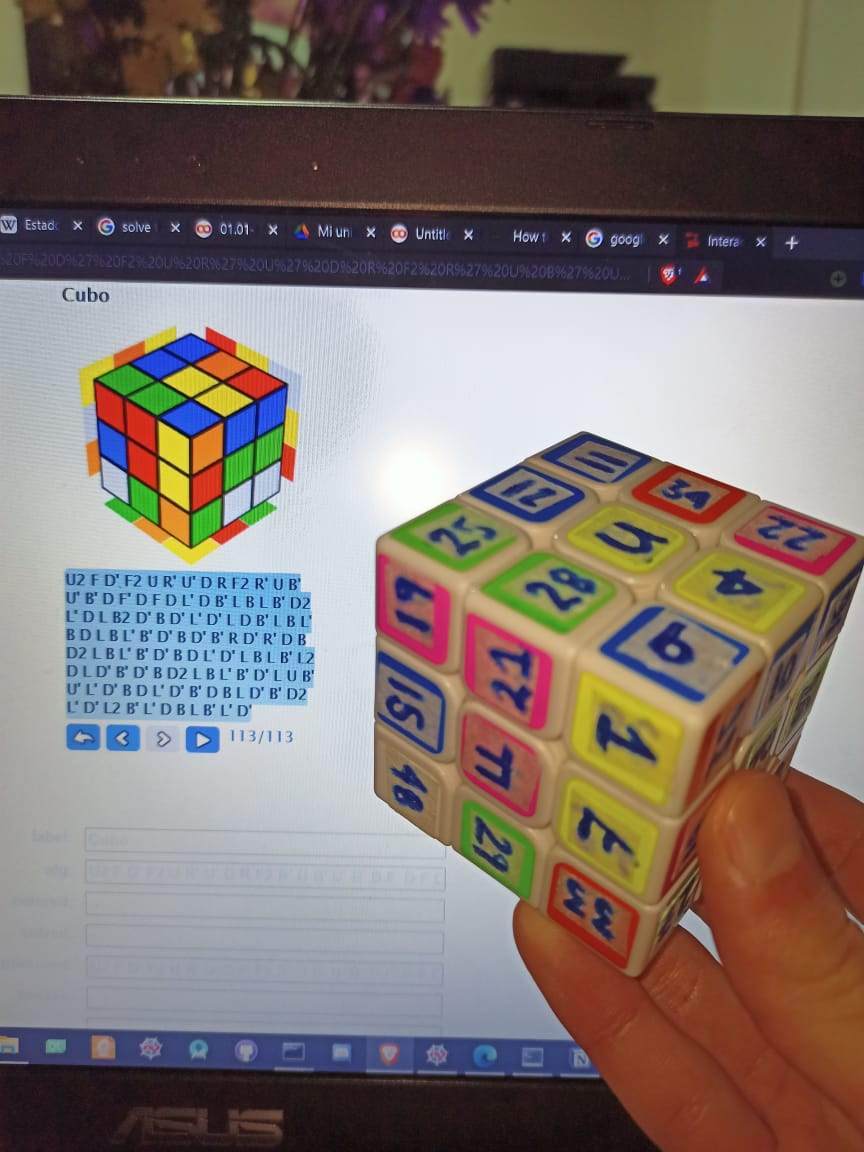

Si lo que tenemos es un algoritmo que no lleva del cubo bien armado a la posición actual, basta con realizar todos los movimientos en sentido contrario, y de esta manera tendríamos una solución, de nuevo, para hacer más rápidas las cosas he utilizado un script para invertir los pasos: 

In [ ]:
solution = "U^2*F*D^-1*F^2*U*R^-1*U^-1*D*R*F^-2*R^-1*U*B^-1*U^-1*B^-1*D*F^-1*D*F*D*L^-1*D*B^-1*L*B*L*B^-1*D^2*L^-1*D*L*B^-2*D^-1*B*D^-1*L^-1*D^-1*L*D*B^-1*L*B*L^-1*B*D*L*B*L^-1*B^-1*D^-1*B*D^-1*B^-1*R*D^-1*R^-1*D*B*D^2*L*B*L^-1*B^-1*D^-1*B*D*L^-1*D^-1*L*B*L*B^-1*L^2*D*L*D^-1*B^-1*D^-1*B*D^2*L*B*L^-1*B^-1*D^-1*L*U*B^-1*U^-1*L^-1*D^-1*B*D*L^-1*D^-1*B^-1*D*B*L*D^-1*B^-1*D^2*L^-1*D^-1*L^-2*B^-1*L^-1*D*B*L*B^-1*L^-1*D^-1"

solution = solution.split("*")

solution = solution[::-1] #Se invierte la lista

ans = "" 

for element in solution: 
    if "^-1" in element: #A lo movimientos inversos los agrego como normales
        ans += element[0]+" " 
    elif "^2" in element or "^-2" in element: #Las rotaciones dobles se dejan igual, no importan
        ans += element[0]+"2 "
    else: #Los movimiento normales les agrego la apostrofe para que sean invertidos 
        ans += element + "' "
        
print(ans)

D L B L' B' D' L B L2 D L D2 B D L' B' D' B D L D' B' D L U B U' L' D B L B' L' D2 B' D B D L' D' L2 B L' B' L' D L D' B' D B L B' L' D2 B' D' R D R' B D B' D B L B' L' D' B' L B' L' B D' L' D L D B' D B2 L' D' L D2 B L' B' L' B D' L D' F' D' F D' B U B U' R F2 R' D' U R U' F2 D F' U2 


#Conclusiones

* Las matemáticas que hay detrás de los puzzles son increíblemente interesantes, muchas veces estos puzzles o juegos solo son vistos como tal, como algo para entretenerse un momento, pero analizarlos a profundidad desde una perspectiva matemática puede ser muy interesante, algunos juegos pueden pasar a ser "juegos de teoría de grupos".
* Pese a que algunos de los conceptos no son precisamente sencillos de entender, es increíble como logrando modelar un puzzle con matemáticas se pueden resolver tantas preguntas de manera muy sencilla, en realidad se usan MUY pocas intrucciones de GAP para resolver una configuración del cubo, mientras que resolverlo desde cero podría ser una tarea muy compleja.
* El aterrizar las matemáticas a un puzzle o un juego, nos crean una idea más tangible de lo que en realidad son. Son una versión más lúdica e interesante de los conceptos, por ejemplo, entender las permutaciones desde el cubo es muy intuitivo e interesante, entender el concepto de generador, por mencionar algunos. 
* Analizar detenidamente un puzzle promueve altamente la capacidad de abstracción y modelamiento, necesaria en carreras como ciencias o ingeniería. 

#Referencias

http://people.math.harvard.edu/~jjchen/docs/Group%20Theory%20and%20the%20Rubik's%20Cube.pdf

http://www.algebra.uni-linz.ac.at/Projects/FurtherProjects/Kainberger/Using_Group_Theory_for_solving_Rubik's_Cube.pdf

https://www.gap-system.org/Doc/Examples/rubik.html

https://www.math.unl.edu/~mbrittenham2/classwk/990s08/public/myasnikov.1.free.groups.pdf

https://mathworld.wolfram.com/GroupHomomorphism.html#:~:text=A%20group%20homomorphism%20is%20a,to%20the%20identity%20element%20in%20%3A%20.
